<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Continued:
            </span>   
        </font>    
</h3>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("cleaned_df_rows.csv")

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,cleaned_narrative,target
0,04/22/2017,Credit card,NaN,Delinquent account,NaN,I have dispute d my Capital One ac count many ...,NaN,CAPITAL ONE FINANCIAL CORPORATION,GA,302XX,NaN,Consent provided,Web,04/22/2017,Closed with explanation,Yes,No,2446771,capital ac count time today date reporting bey...,0
1,04/22/2017,Credit card,NaN,Other,NaN,I received a phone call from a female XXXX s...,NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,100XX,NaN,Consent provided,Web,04/22/2017,Closed with explanation,Yes,No,2446506,female X supposedly X X X X regard summon supp...,0
2,04/22/2017,Bank account or service,(CD) Certificate of deposit,"Account opening, closing, or management",NaN,Bank accounts ( CD & Money Markets ) w as ope...,Company has responded to the consumer and the ...,U.S. BANCORP,IL,60643,NaN,Consent provided,Web,04/22/2017,Closed with explanation,Yes,No,2447675,account cd market w open single owner X X X X ...,0
3,04/22/2017,Credit reporting,NaN,Incorrect information on credit report,Account status,At the beginning of XXXX I started receiving...,NaN,ENCORE CAPITAL GROUP INC.,NY,136XX,NaN,Consent provided,Web,04/25/2017,Closed with explanation,Yes,No,2447345,begin X start receive letter midlabd funding s...,0
4,04/21/2017,Credit reporting,NaN,Credit reporting company's investigation,Problem with statement of dispute,I HAVE DISPUTED WIT H TRANS UNION OV ER MY CRE...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,322XX,NaN,Consent provided,Web,04/21/2017,Closed with explanation,Yes,No,2447645,wit h trans union ov er inquires one follow X ...,0


In [ ]:
df['Product'].value_counts()

,count
Product,
Debt collection,40510
Mortgage,32937
Credit reporting,31706
Credit card,18891
Bank account or service,14929
Student loan,11166
Consumer Loan,9519
Payday loan,1760
Money transfers,1504


In [ ]:
df['Product'].isnull().sum()

np.int64(0)

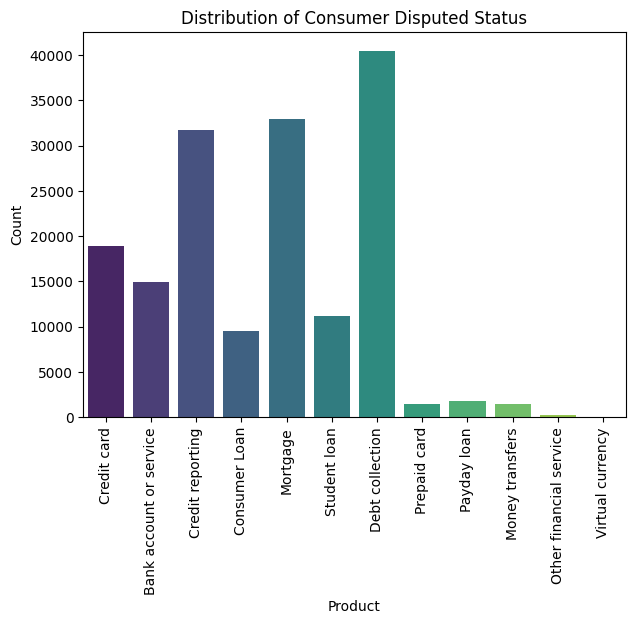

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Product', palette='viridis')
plt.title('Distribution of Consumer Disputed Status')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This chart shows the absolute count of disputed complaints for each product, revealing that Debt collection is the source of the most disputes by far, with over 40,000. Mortgage and Credit reporting also contribute a very high volume of disputed cases. This indicates that the products with the highest overall complaint volumes are also the ones where consumers most frequently disagree with the company's resolution.
    </span>    
</div>

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            4. Data Preprocessing
            </span>   
        </font>    
</h2>

In [ ]:
threshold = 2000

product_counts = df['Product'].value_counts()

to_replace = product_counts[product_counts < threshold].index

df.loc[df['Product'].isin(to_replace), 'Product'] = 'Other'

print("New value counts after grouping rare categories:")
print(df['Product'].value_counts())

New value counts after grouping rare categories:
Product
Debt collection            40510
Mortgage                   32937
Credit reporting           31706
Credit card                18891
Bank account or service    14929
Student loan               11166
Consumer Loan               9519
Other                       5027
Name: count, dtype: int64


In [ ]:
df=df.drop('target',axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['Product'])

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,cleaned_narrative,target
0,04/22/2017,Credit card,NaN,Delinquent account,NaN,I have dispute d my Capital One ac count many ...,NaN,CAPITAL ONE FINANCIAL CORPORATION,GA,302XX,NaN,Consent provided,Web,04/22/2017,Closed with explanation,Yes,No,2446771,capital ac count time today date reporting bey...,2
1,04/22/2017,Credit card,NaN,Other,NaN,I received a phone call from a female XXXX s...,NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,100XX,NaN,Consent provided,Web,04/22/2017,Closed with explanation,Yes,No,2446506,female X supposedly X X X X regard summon supp...,2
2,04/22/2017,Bank account or service,(CD) Certificate of deposit,"Account opening, closing, or management",NaN,Bank accounts ( CD & Money Markets ) w as ope...,Company has responded to the consumer and the ...,U.S. BANCORP,IL,60643,NaN,Consent provided,Web,04/22/2017,Closed with explanation,Yes,No,2447675,account cd market w open single owner X X X X ...,0
3,04/22/2017,Credit reporting,NaN,Incorrect information on credit report,Account status,At the beginning of XXXX I started receiving...,NaN,ENCORE CAPITAL GROUP INC.,NY,136XX,NaN,Consent provided,Web,04/25/2017,Closed with explanation,Yes,No,2447345,begin X start receive letter midlabd funding s...,3
4,04/21/2017,Credit reporting,NaN,Credit reporting company's investigation,Problem with statement of dispute,I HAVE DISPUTED WIT H TRANS UNION OV ER MY CRE...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,322XX,NaN,Consent provided,Web,04/21/2017,Closed with explanation,Yes,No,2447645,wit h trans union ov er inquires one follow X ...,3


In [ ]:
df['target'].value_counts()

,count
target,
4,40510
5,32937
3,31706
2,18891
0,14929
7,11166
1,9519
6,5027


In [ ]:
# Calculate class weights for imbalance handling
from sklearn.utils.class_weight import compute_class_weight
y = df['target']
classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights = dict(zip(classes, weights))
print("Calculated Class Weights:")
print(class_weights)

Calculated Class Weights:
{np.int64(0): np.float64(1.3789018018621475), np.int64(1): np.float64(2.1625827292782853), np.int64(2): np.float64(1.0897054152771162), np.int64(3): np.float64(0.6492659118147984), np.int64(4): np.float64(0.5081615650456678), np.int64(5): np.float64(0.625), np.int64(6): np.float64(4.09501193554804), np.int64(7): np.float64(1.8435988715744223)}


In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'cleaned_narrative', 'target'],
      dtype='object')

In [ ]:
# --- 3. Define Categorical Features & Handle Missing Values ---
# These features will be used differently for DL vs ML models
categorical_features = ['Product', 'Issue', 'Company', 'Submitted via', 'State', 'Timely response?']

for col in categorical_features:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown').astype(str)
    else:
        df[col] = df[col].astype(str)
print("3. Categorical features handled missing values and cast to string.")

3. Categorical features handled missing values and cast to string.


In [ ]:
df1=df[['cleaned_narrative','target']]

In [ ]:
df1.head()

,cleaned_narrative,target
0,capital ac count time today date reporting bey...,2
1,female X supposedly X X X X regard summon supp...,2
2,account cd market w open single owner X X X X ...,0
3,begin X start receive letter midlabd funding s...,3
4,wit h trans union ov er inquires one follow X ...,3


In [ ]:
df1['cleaned_narrative'] = df1['cleaned_narrative'].str.replace(r'\s+X\s+', ' ', regex=True)
# Remove any standalone 'X's that might be left
df1['cleaned_narrative'] = df1['cleaned_narrative'].str.replace('X', '', regex=False)
# Display the original and the newly cleaned columns side-by-side
df1.head()

,cleaned_narrative,target
0,capital ac count time today date reporting bey...,2
1,female supposedly regard summon supposedly o...,2
2,account cd market w open single owner close ...,0
3,begin start receive letter midlabd funding say...,3
4,wit h trans union ov er inquires one follow ...,3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# --- THE FIX IS HERE ---
# Fill any potential NaN values in your text column with an empty string
df1['cleaned_narrative'].fillna('', inplace=True)

# 1. Define your features (X) and target (y)
X = df1['cleaned_narrative']
y = df1['target']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3. Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# 4. Fit and transform the training data (this will now work)
X_train_tfidf = tfidf.fit_transform(X_train)

# 5. Transform the test data
X_test_tfidf = tfidf.transform(X_test)

# --- Verification ---
print("Shape of the training data (features):", X_train_tfidf.shape)
print("Shape of the testing data (features):", X_test_tfidf.shape)

Shape of the training data (features): (131748, 5000)
Shape of the testing data (features): (32937, 5000)


<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            5. Machine Learning Model
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.1 Logistic Regression
            </span>   
        </font>    
</h3>

Training the Logistic Regression model...
Training complete.

--- Evaluation Metrics ---
Accuracy Score: 0.8269
Weighted Precision Score: 0.8354
Weighted Recall Score: 0.8269
Weighted ROC AUC Score: 0.9720

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.78      0.77      0.78      2986
          Consumer Loan       0.62      0.73      0.67      1904
            Credit card       0.77      0.77      0.77      3778
       Credit reporting       0.87      0.84      0.85      6341
        Debt collection       0.86      0.80      0.83      8102
               Mortgage       0.94      0.93      0.93      6587
                  Other       0.48      0.72      0.57      1006
           Student loan       0.88      0.90      0.89      2233

               accuracy                           0.83     32937
              macro avg       0.77      0.81      0.79     32937
           weighted avg       0.84      0.83  

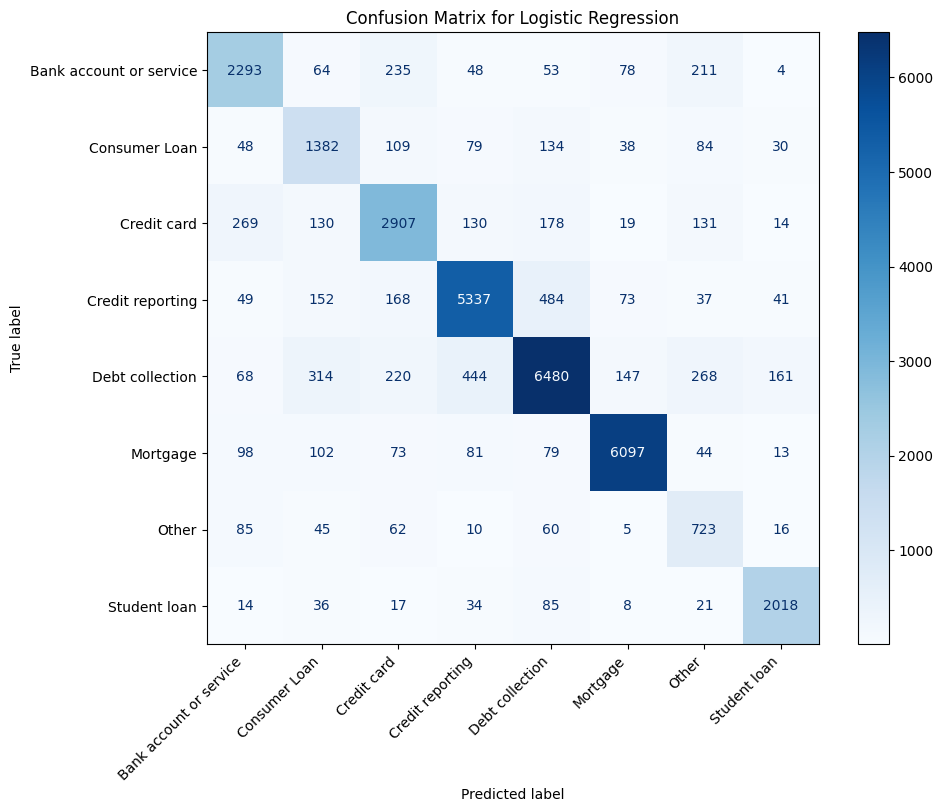

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize and Train the Logistic Regression Model
# We use class_weight='balanced' to handle the imbalanced data.
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

print("Training the Logistic Regression model...")
model.fit(X_train_tfidf, y_train)
print("Training complete.")

# 2. Make Predictions on the Test Data
y_pred = model.predict(X_test_tfidf)
y_pred_proba = model.predict_proba(X_test_tfidf) # For ROC AUC

# 3. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Precision, Recall (using weighted average for multi-class)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision Score: {precision:.4f}")
print(f"Weighted Recall Score: {recall:.4f}")

# ROC AUC Score (using weighted average for multi-class)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
print(f"Weighted ROC AUC Score: {roc_auc:.4f}")

# You can also print the full classification report for a detailed breakdown
print("\n--- Classification Report ---")
# Use le.classes_ to get the actual product names
print(classification_report(y_test, y_pred, target_names=le.classes_))


# 4. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to make room for labels
plt.title("Confusion Matrix for Logistic Regression")
plt.savefig("confusion_matrix_lr.png")
print("Confusion Matrix saved as 'confusion_matrix_lr.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.2 Multinomial Naive Bayes
            </span>   
        </font>    
</h3>

Training the Multinomial Naive Bayes model...
Training complete.

--- Evaluation Metrics ---
Accuracy Score: 0.8063
Weighted Precision Score: 0.8065
Weighted Recall Score: 0.8063
Weighted ROC AUC Score: 0.9650

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.79      0.75      0.77      2986
          Consumer Loan       0.82      0.49      0.61      1904
            Credit card       0.74      0.73      0.73      3778
       Credit reporting       0.81      0.84      0.82      6341
        Debt collection       0.77      0.86      0.81      8102
               Mortgage       0.86      0.95      0.90      6587
                  Other       0.80      0.28      0.42      1006
           Student loan       0.89      0.83      0.86      2233

               accuracy                           0.81     32937
              macro avg       0.81      0.72      0.74     32937
           weighted avg       0.81      0.

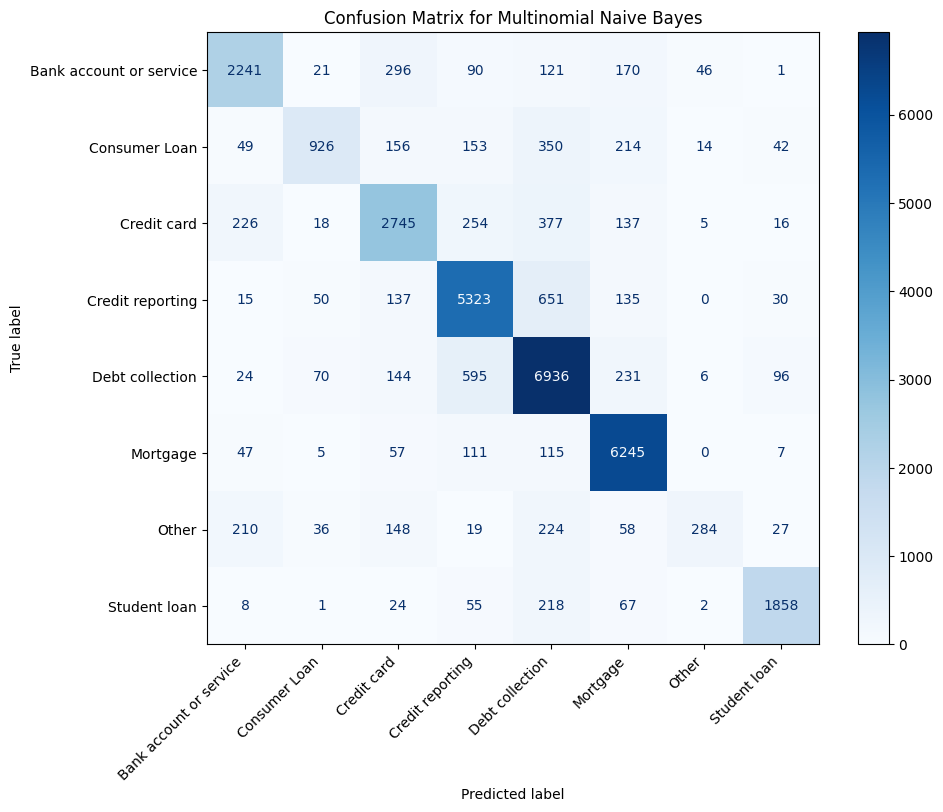

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize and Train the Multinomial Naive Bayes Model
# Naive Bayes models don't have a 'class_weight' parameter in the same way,
# but they are often less sensitive to imbalanced data than other models.
model_nb = MultinomialNB()

print("Training the Multinomial Naive Bayes model...")
model_nb.fit(X_train_tfidf, y_train)
print("Training complete.")

# 2. Make Predictions on the Test Data
y_pred_nb = model_nb.predict(X_test_tfidf)
y_pred_proba_nb = model_nb.predict_proba(X_test_tfidf) # For ROC AUC

# 3. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy Score: {accuracy_nb:.4f}")

# Precision, Recall (using weighted average)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
print(f"Weighted Precision Score: {precision_nb:.4f}")
print(f"Weighted Recall Score: {recall_nb:.4f}")

# ROC AUC Score (using weighted average)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr', average='weighted')
print(f"Weighted ROC AUC Score: {roc_auc_nb:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))


# 4. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model_nb,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.savefig("confusion_matrix_nb.png")
print("Confusion Matrix saved as 'confusion_matrix_nb.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.3 KNN
            </span>   
        </font>    
</h3>

Training the KNN model...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Metrics ---
Accuracy Score: 0.4122
Weighted Precision Score: 0.5925
Weighted Recall Score: 0.4122
Weighted ROC AUC Score: 0.7100

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.67      0.27      0.38      2986
          Consumer Loan       0.72      0.19      0.31      1904
            Credit card       0.69      0.28      0.40      3778
       Credit reporting       0.29      0.80      0.43      6341
        Debt collection       0.42      0.49      0.45      8102
               Mortgage       0.84      0.27      0.41      6587
                  Other       0.72      0.17      0.27      1006
           Student loan       0.90      0.15      0.26      2233

               accuracy                           0.41     32937
              macro avg       0.66      0.33      0.36     32937
           weighte

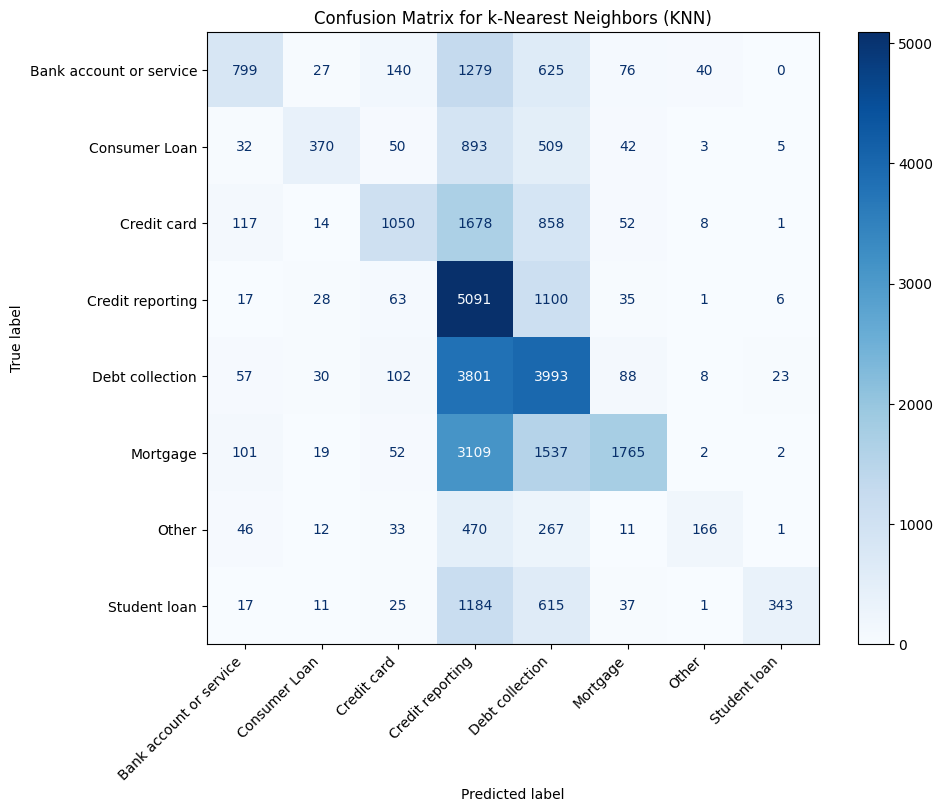

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize and Train the KNN Model
# We'll start with a common choice of n_neighbors=5
model_knn = KNeighborsClassifier(n_neighbors=5)

print("Training the KNN model...")
model_knn.fit(X_train_tfidf, y_train)
print("Training complete.")

# 2. Make Predictions on the Test Data
print("Making predictions...")
y_pred_knn = model_knn.predict(X_test_tfidf)
y_pred_proba_knn = model_knn.predict_proba(X_test_tfidf) # For ROC AUC
print("Predictions complete.")


# 3. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy Score: {accuracy_knn:.4f}")

# Precision, Recall (using weighted average)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print(f"Weighted Precision Score: {precision_knn:.4f}")
print(f"Weighted Recall Score: {recall_knn:.4f}")

# ROC AUC Score (using weighted average)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr', average='weighted')
print(f"Weighted ROC AUC Score: {roc_auc_knn:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


# 4. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model_knn,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for k-Nearest Neighbors (KNN)")
plt.savefig("confusion_matrix_knn.png")
print("Confusion Matrix saved as 'confusion_matrix_knn.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.4 SVM
            </span>   
        </font>    
</h3>

Training the LinearSVC model... (This will be much faster!)
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Metrics ---
Accuracy Score: 0.8333
Weighted Precision Score: 0.8352
Weighted Recall Score: 0.8333

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.78      0.77      0.77      2986
          Consumer Loan       0.68      0.68      0.68      1904
            Credit card       0.76      0.78      0.77      3778
       Credit reporting       0.87      0.85      0.86      6341
        Debt collection       0.85      0.83      0.84      8102
               Mortgage       0.93      0.94      0.94      6587
                  Other       0.53      0.63      0.58      1006
           Student loan       0.88      0.90      0.89      2233

               accuracy                           0.83     32937
              macro avg       0.78      0.80      0.79     32937
           weig

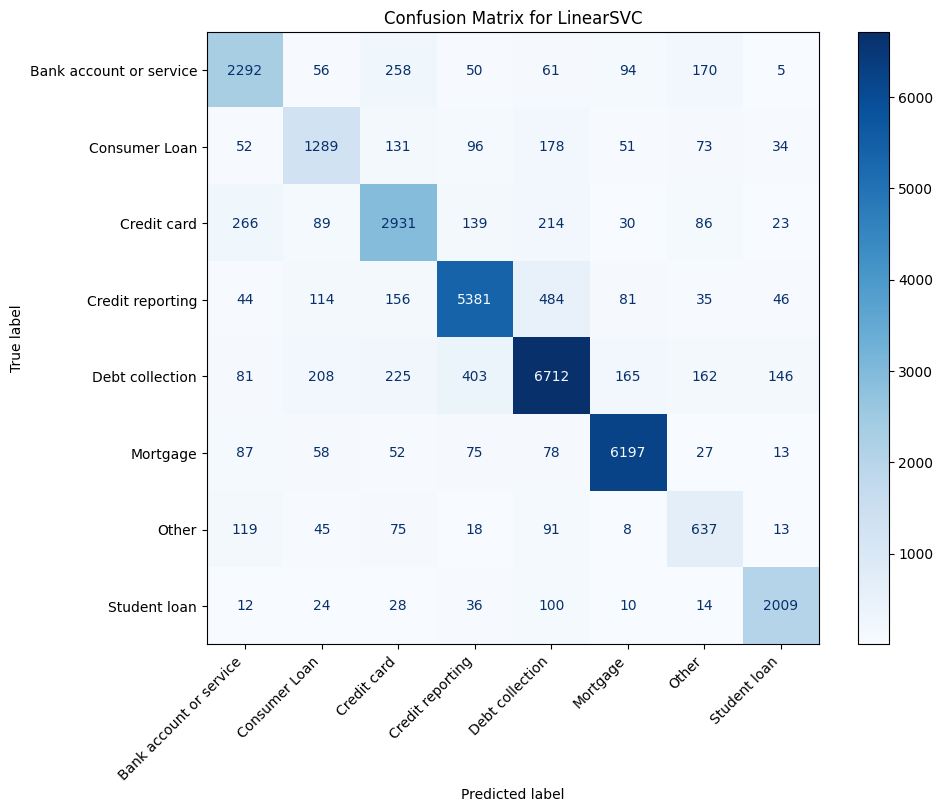

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize and Train the LinearSVC Model
# This is much faster than the standard SVC.
model_linear_svm = LinearSVC(
    class_weight='balanced',
    random_state=42,
    max_iter=2000 # Increased max_iter for convergence
)

print("Training the LinearSVC model... (This will be much faster!)")
model_linear_svm.fit(X_train_tfidf, y_train)
print("Training complete.")

# 2. Make Predictions on the Test Data
print("Making predictions...")
y_pred_linear_svm = model_linear_svm.predict(X_test_tfidf)
print("Predictions complete.")


# 3. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)
print(f"Accuracy Score: {accuracy_linear_svm:.4f}")

# Precision, Recall (using weighted average)
precision_linear_svm = precision_score(y_test, y_pred_linear_svm, average='weighted')
recall_linear_svm = recall_score(y_test, y_pred_linear_svm, average='weighted')
print(f"Weighted Precision Score: {precision_linear_svm:.4f}")
print(f"Weighted Recall Score: {recall_linear_svm:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_linear_svm, target_names=le.classes_))


# 4. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model_linear_svm,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for LinearSVC")
plt.savefig("confusion_matrix_linear_svc.png")
print("Confusion Matrix saved as 'confusion_matrix_linear_svc.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Decision Trees
            </span>   
        </font>    
</h3>

Training the Decision Tree model...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Metrics ---
Accuracy Score: 0.7123
Weighted Precision Score: 0.7152
Weighted Recall Score: 0.7123
Weighted ROC AUC Score: 0.8307

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.61      0.60      0.61      2986
          Consumer Loan       0.46      0.47      0.46      1904
            Credit card       0.57      0.57      0.57      3778
       Credit reporting       0.80      0.80      0.80      6341
        Debt collection       0.72      0.73      0.72      8102
               Mortgage       0.87      0.82      0.84      6587
                  Other       0.38      0.43      0.41      1006
           Student loan       0.78      0.79      0.78      2233

               accuracy                           0.71     32937
              macro avg       0.65      0.65      0.65     32937
        

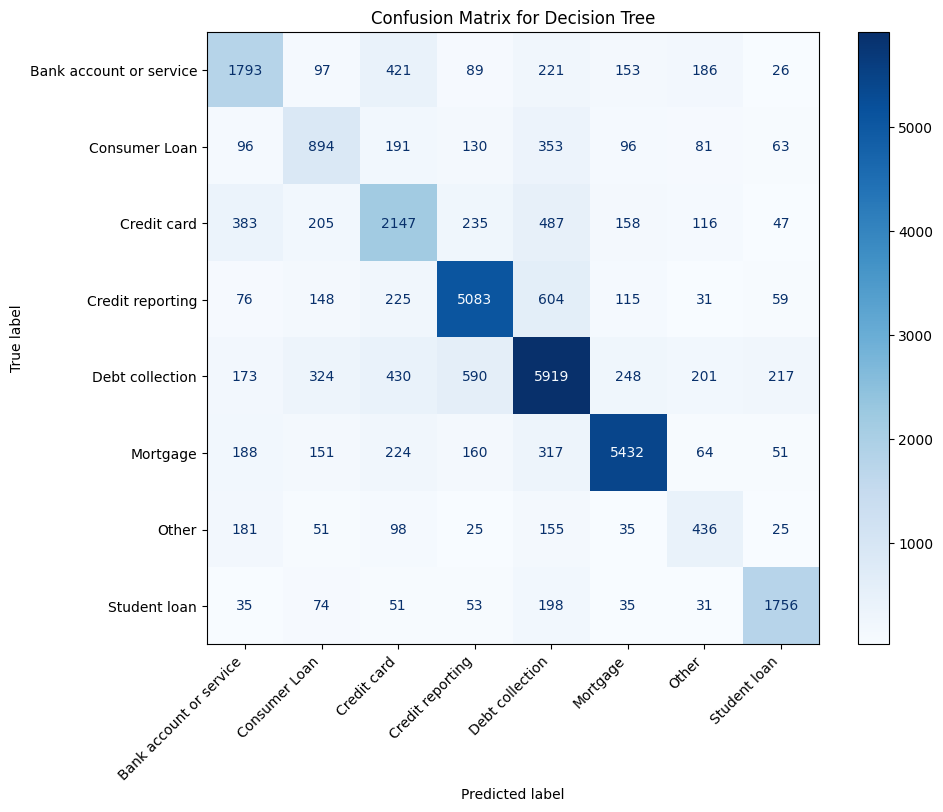

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize and Train the Decision Tree Model
# We use class_weight='balanced' to handle the imbalanced data.
model_dt = DecisionTreeClassifier(
    class_weight='balanced',
    random_state=42
)

print("Training the Decision Tree model...")
model_dt.fit(X_train_tfidf, y_train)
print("Training complete.")

# 2. Make Predictions on the Test Data
print("Making predictions...")
y_pred_dt = model_dt.predict(X_test_tfidf)
y_pred_proba_dt = model_dt.predict_proba(X_test_tfidf) # For ROC AUC
print("Predictions complete.")


# 3. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score: {accuracy_dt:.4f}")

# Precision, Recall (using weighted average)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print(f"Weighted Precision Score: {precision_dt:.4f}")
print(f"Weighted Recall Score: {recall_dt:.4f}")

# ROC AUC Score (using weighted average)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr', average='weighted')
print(f"Weighted ROC AUC Score: {roc_auc_dt:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


# 4. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model_dt,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for Decision Tree")
plt.savefig("confusion_matrix_dt.png")
print("Confusion Matrix saved as 'confusion_matrix_dt.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.6 Random Forest
            </span>   
        </font>    
</h3>

Training the Random Forest model...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Metrics ---
Accuracy Score: 0.8250
Weighted Precision Score: 0.8239
Weighted Recall Score: 0.8250
Weighted ROC AUC Score: 0.9680

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.76      0.76      0.76      2986
          Consumer Loan       0.81      0.53      0.64      1904
            Credit card       0.76      0.72      0.74      3778
       Credit reporting       0.85      0.87      0.86      6341
        Debt collection       0.79      0.88      0.83      8102
               Mortgage       0.90      0.94      0.92      6587
                  Other       0.79      0.37      0.50      1006
           Student loan       0.87      0.88      0.88      2233

               accuracy                           0.82     32937
              macro avg       0.82      0.74      0.77     32937
        

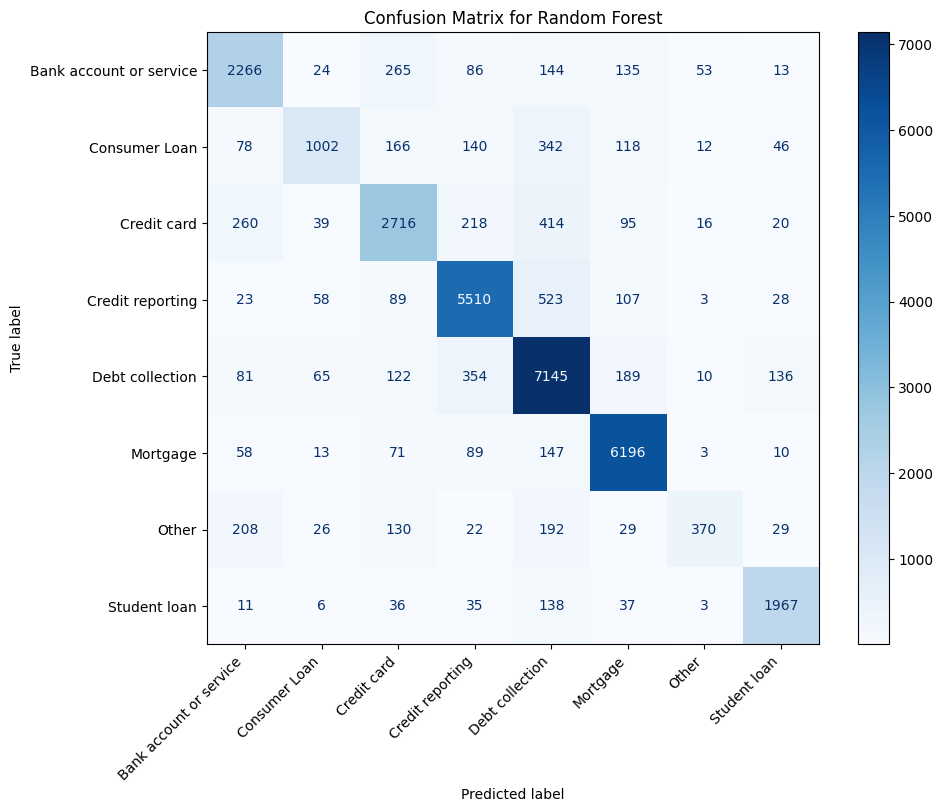

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize and Train the Random Forest Model
# n_estimators=100 is a common starting point.
# class_weight='balanced' helps with the imbalanced data.
# n_jobs=-1 uses all available CPU cores to speed up training.
model_rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Training the Random Forest model...")
model_rf.fit(X_train_tfidf, y_train)
print("Training complete.")

# 2. Make Predictions on the Test Data
print("Making predictions...")
y_pred_rf = model_rf.predict(X_test_tfidf)
y_pred_proba_rf = model_rf.predict_proba(X_test_tfidf) # For ROC AUC
print("Predictions complete.")


# 3. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_rf:.4f}")

# Precision, Recall (using weighted average)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Weighted Precision Score: {precision_rf:.4f}")
print(f"Weighted Recall Score: {recall_rf:.4f}")

# ROC AUC Score (using weighted average)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr', average='weighted')
print(f"Weighted ROC AUC Score: {roc_auc_rf:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


# 4. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model_rf,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for Random Forest")
plt.savefig("confusion_matrix_rf.png")
print("Confusion Matrix saved as 'confusion_matrix_rf.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.7 XGBoost
            </span>   
        </font>    
</h3>

Training the XGBoost model...
Training complete.
Making predictions...
Predictions complete.

--- Evaluation Metrics ---
Accuracy Score: 0.8283
Weighted Precision Score: 0.8335
Weighted Recall Score: 0.8283
Weighted ROC AUC Score: 0.9721

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.79      0.76      0.78      2986
          Consumer Loan       0.64      0.70      0.67      1904
            Credit card       0.78      0.77      0.77      3778
       Credit reporting       0.87      0.85      0.86      6341
        Debt collection       0.85      0.80      0.82      8102
               Mortgage       0.93      0.93      0.93      6587
                  Other       0.49      0.69      0.57      1006
           Student loan       0.86      0.91      0.89      2233

               accuracy                           0.83     32937
              macro avg       0.78      0.80      0.79     32937
           wei

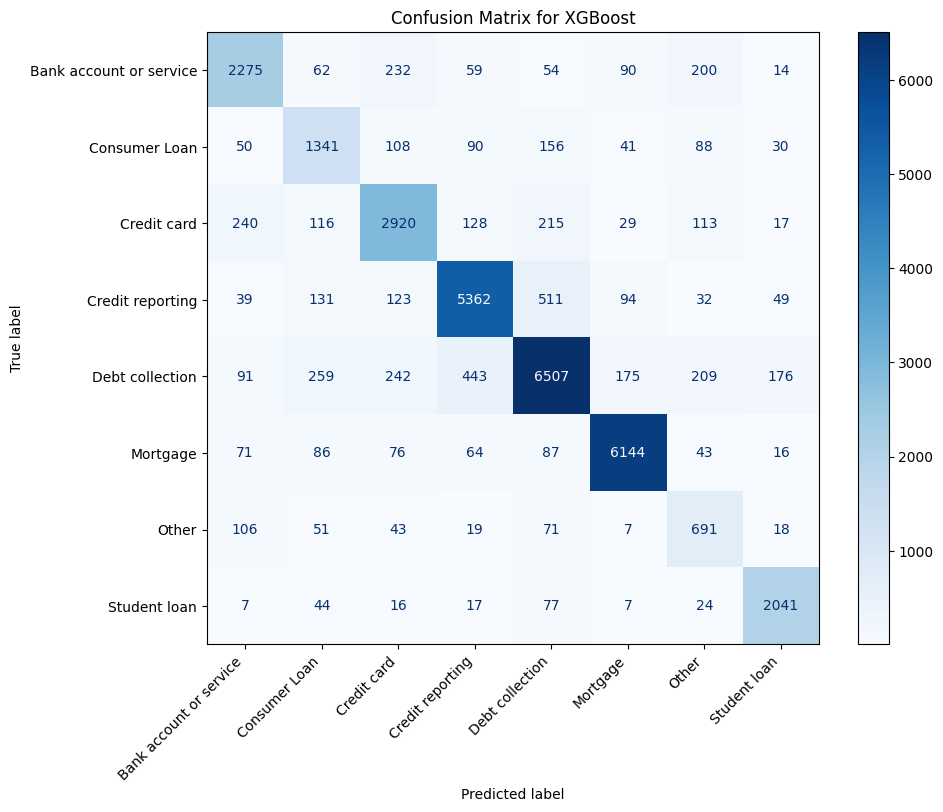

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    ConfusionMatrixDisplay,
    classification_report
)

# 1. Initialize the XGBoost Model
model_xgb = xgb.XGBClassifier(
    objective='multi:softprob', # for multi-class classification
    random_state=42,
    n_jobs=-1
)

# 2. Calculate Sample Weights for Imbalance Handling
# This is the correct way to handle imbalance for XGBoost's fit method
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

# 3. Train the Model
print("Training the XGBoost model...")
# Pass the sample weights to the fit method
model_xgb.fit(X_train_tfidf, y_train, sample_weight=sample_weights)
print("Training complete.")

# 4. Make Predictions on the Test Data
print("Making predictions...")
y_pred_xgb = model_xgb.predict(X_test_tfidf)
y_pred_proba_xgb = model_xgb.predict_proba(X_test_tfidf) # For ROC AUC
print("Predictions complete.")


# 5. Calculate and Print Evaluation Metrics
print("\n--- Evaluation Metrics ---")

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy Score: {accuracy_xgb:.4f}")

# Precision, Recall (using weighted average)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
print(f"Weighted Precision Score: {precision_xgb:.4f}")
print(f"Weighted Recall Score: {recall_xgb:.4f}")

# ROC AUC Score (using weighted average)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb, multi_class='ovr', average='weighted')
print(f"Weighted ROC AUC Score: {roc_auc_xgb:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


# 6. Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_estimator(
    model_xgb,
    X_test_tfidf,
    y_test,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for XGBoost")
plt.savefig("confusion_matrix_xgb.png")
print("Confusion Matrix saved as 'confusion_matrix_xgb.png'")

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            6. Deep Learning Model
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.1 Simple RNN
            </span>   
        </font>    
</h3>

--- Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training the Simple RNN model ---
Epoch 1/5
4118/4118 - 122s - 30ms/step - accuracy: 0.3159 - loss: 1.8052 - val_accuracy: 0.3750 - val_loss: 1.6553
Epoch 2/5
4118/4118 - 139s - 34ms/step - accuracy: 0.5013 - loss: 1.3610 - val_accuracy: 0.5699 - val_loss: 1.2212
Epoch 3/5
4118/4118 - 142s - 34ms/step - accuracy: 0.5559 - loss: 1.2475 - val_accuracy: 0.5572 - val_loss: 1.2220
Epoch 4/5
4118/4118 - 118s - 29ms/step - accuracy: 0.6139 - loss: 1.1024 - val_accuracy: 0.6454 - val_loss: 1.0519
Epoch 5/5
4118/4118 - 142s - 34ms/step - accuracy: 0.6347 - loss: 1.0575 - val_accuracy: 0.6578 - val_loss: 1.0320
Training complete.

--- Evaluating the model on the test set ---
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step

--- Evaluation Metrics ---
Accuracy Score: 0.6578

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.52      0.43      0.47      2986
          Consumer Loan       0.32      0.04      0.07      1904


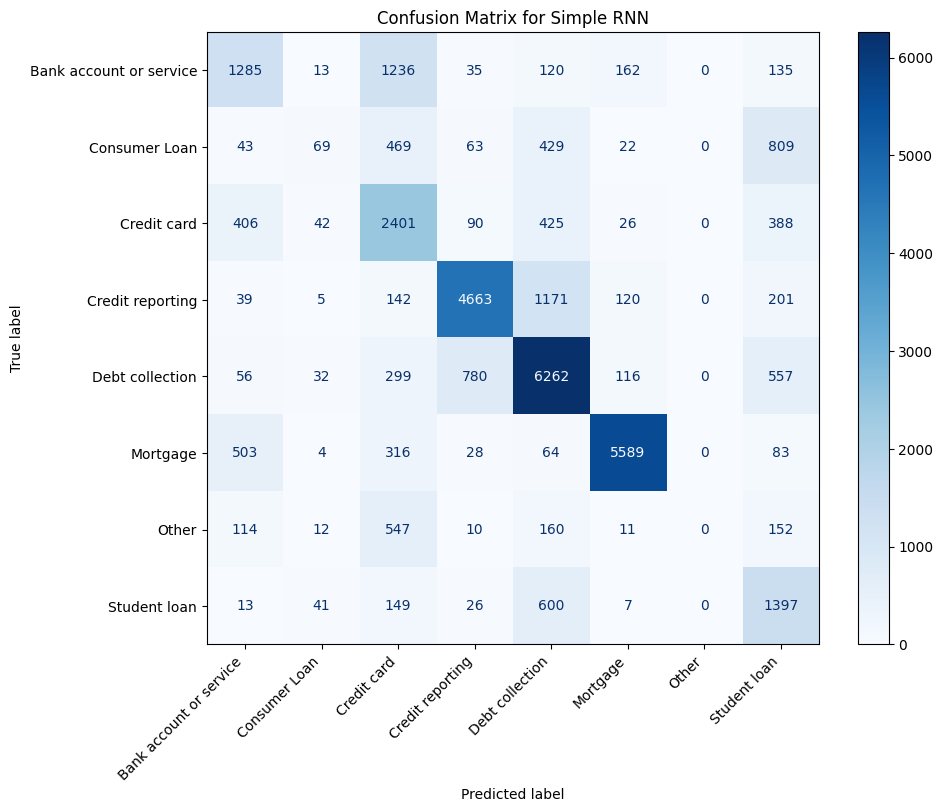

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)


# --- 1. Text Preprocessing for Deep Learning ---

# Define vocabulary size and max sequence length
VOCAB_SIZE = 8000  # Number of unique words to consider
MAX_LENGTH = 100    # Max length of a sequence (complaint)
EMBEDDING_DIM = 32  # Dimension of the word embeddings

# Initialize and fit the tokenizer on the training text
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure they all have the same length
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

# --- 2. Build the Simple RNN Model ---

model_rnn = Sequential([
    # Layer 1: Embedding layer to convert word indices into dense vectors
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),

    # Layer 2: The SimpleRNN layer
    SimpleRNN(64), # 64 units in the RNN layer

    # Layer 3: The output layer
    # The number of units must match the number of classes (e.g., len(le.classes_))
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model_rnn.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
print("--- Model Summary ---")
model_rnn.summary()


# --- 3. Train the Model ---

print("\n--- Training the Simple RNN model ---")
history = model_rnn.fit(
    X_train_pad, y_train,
    epochs=5, # Start with a few epochs
    batch_size=32,
    validation_data=(X_test_pad, y_test),
    verbose=2
)
print("Training complete.")


# --- 4. Evaluate the Model ---

print("\n--- Evaluating the model on the test set ---")
# Get predictions (probabilities)
y_pred_proba_rnn = model_rnn.predict(X_test_pad)
# Convert probabilities to class labels
y_pred_rnn = np.argmax(y_pred_proba_rnn, axis=1)

print("\n--- Evaluation Metrics ---")
# Accuracy
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print(f"Accuracy Score: {accuracy_rnn:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_rnn, target_names=le.classes_))

# Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
# Use from_predictions as we don't have a scikit-learn estimator
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rnn,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for Simple RNN")
plt.savefig("confusion_matrix_rnn.png")
print("Confusion Matrix saved as 'confusion_matrix_rnn.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.2 Bidirectional LSTM
            </span>   
        </font>    
</h3>

--- Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training the Bidirectional LSTM model ---
Epoch 1/5
1030/1030 - 284s - 276ms/step - accuracy: 0.7397 - loss: 0.7877 - val_accuracy: 0.8309 - val_loss: 0.5444
Epoch 2/5
1030/1030 - 298s - 289ms/step - accuracy: 0.8489 - loss: 0.4910 - val_accuracy: 0.8393 - val_loss: 0.5089
Epoch 3/5
1030/1030 - 302s - 293ms/step - accuracy: 0.8627 - loss: 0.4406 - val_accuracy: 0.8421 - val_loss: 0.5027
Epoch 4/5
1030/1030 - 322s - 313ms/step - accuracy: 0.8723 - loss: 0.4097 - val_accuracy: 0.8423 - val_loss: 0.5029
Epoch 5/5
1030/1030 - 322s - 313ms/step - accuracy: 0.8783 - loss: 0.3881 - val_accuracy: 0.8445 - val_loss: 0.4971
Training complete.

--- Evaluating the model on the test set ---
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step

--- Evaluation Metrics ---
Accuracy Score: 0.8445

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.81      0.75      0.78      2986
          Consumer Loan       0.76      0.65      

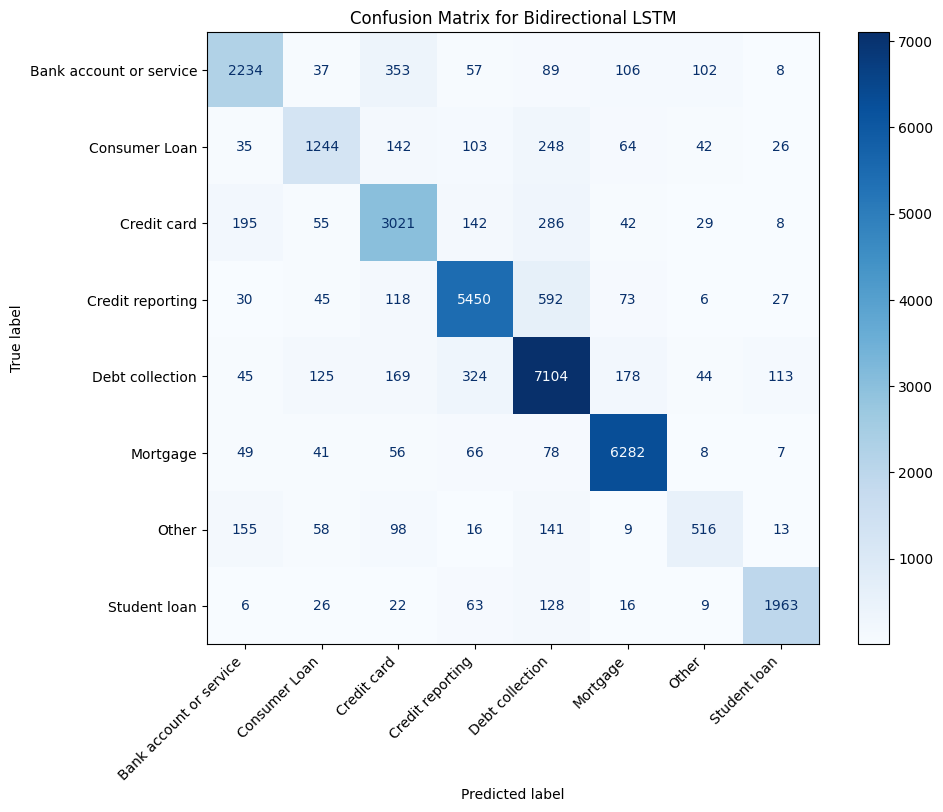

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

# --- Define Model Parameters (use the same ones as your last run for a fair comparison) ---
VOCAB_SIZE = 8000
MAX_LENGTH = 100
EMBEDDING_DIM = 32


# --- 1. Build the Bidirectional LSTM Model ---

model_bilstm = Sequential([
    # Layer 1: Embedding layer
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),

    # Layer 2: The Bidirectional wrapper around an LSTM layer
    # This processes the sequence from start to end and from end to start
    Bidirectional(LSTM(64)), # 64 units in the LSTM layer

    # Layer 3: The output layer
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model_bilstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
print("--- Model Summary ---")
model_bilstm.summary()


# --- 2. Train the Model ---

print("\n--- Training the Bidirectional LSTM model ---")
history = model_bilstm.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test_pad, y_test),
    verbose=2
)
print("Training complete.")


# --- 3. Evaluate the Model ---

print("\n--- Evaluating the model on the test set ---")
# Get predictions (probabilities)
y_pred_proba_bilstm = model_bilstm.predict(X_test_pad)
# Convert probabilities to class labels
y_pred_bilstm = np.argmax(y_pred_proba_bilstm, axis=1)

print("\n--- Evaluation Metrics ---")
# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Accuracy Score: {accuracy_bilstm:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_bilstm, target_names=le.classes_))

# Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_bilstm,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for Bidirectional LSTM")
plt.savefig("confusion_matrix_bilstm.png")
print("Confusion Matrix saved as 'confusion_matrix_bilstm.png'")

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.3 GRU
            </span>   
        </font>    
</h3>

--- Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- Training the GRU model ---
Epoch 1/5
1030/1030 - 197s - 192ms/step - accuracy: 0.6035 - loss: 1.1191 - val_accuracy: 0.7877 - val_loss: 0.6918
Epoch 2/5
1030/1030 - 193s - 187ms/step - accuracy: 0.8180 - loss: 0.5973 - val_accuracy: 0.8254 - val_loss: 0.5665
Epoch 3/5
1030/1030 - 203s - 197ms/step - accuracy: 0.8495 - loss: 0.4931 - val_accuracy: 0.8409 - val_loss: 0.5119
Epoch 4/5
1030/1030 - 191s - 185ms/step - accuracy: 0.8658 - loss: 0.4364 - val_accuracy: 0.8422 - val_loss: 0.5010
Epoch 5/5
1030/1030 - 189s - 184ms/step - accuracy: 0.8751 - loss: 0.4041 - val_accuracy: 0.8450 - val_loss: 0.5050
Training complete.

--- Evaluating the model on the test set ---
1030/1030 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step

--- Evaluation Metrics ---
Accuracy Score: 0.8450

--- Classification Report ---
                         precision    recall  f1-score   support

Bank account or service       0.80      0.76      0.78      2986
          Consumer Loan       0.77      0.64      0.70      1904


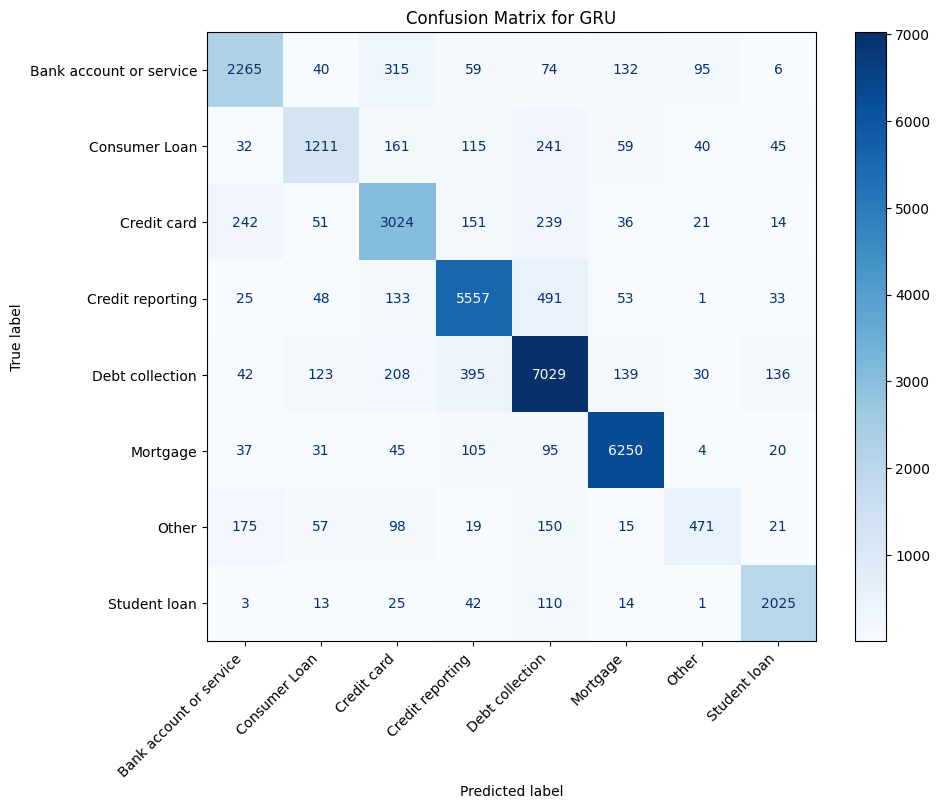

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

# --- Define Model Parameters (use the same ones as your last run for a fair comparison) ---
VOCAB_SIZE = 8000
MAX_LENGTH = 100
EMBEDDING_DIM = 32

# --- 1. Build the GRU Model ---

model_gru = Sequential([
    # Layer 1: Embedding layer
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LENGTH),

    # Layer 2: The GRU layer
    GRU(64), # 64 units in the GRU layer

    # Layer 3: The output layer
    Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model_gru.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
print("--- Model Summary ---")
model_gru.summary()


# --- 2. Train the Model ---

print("\n--- Training the GRU model ---")
history = model_gru.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test_pad, y_test),
    verbose=2
)
print("Training complete.")


# --- 3. Evaluate the Model ---

print("\n--- Evaluating the model on the test set ---")
# Get predictions (probabilities)
y_pred_proba_gru = model_gru.predict(X_test_pad)
# Convert probabilities to class labels
y_pred_gru = np.argmax(y_pred_proba_gru, axis=1)

print("\n--- Evaluation Metrics ---")
# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Accuracy Score: {accuracy_gru:.4f}")

# Print the full classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_gru, target_names=le.classes_))

# Plot the Confusion Matrix
print("\n--- Generating Confusion Matrix ---")
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_gru,
    display_labels=le.classes_,
    cmap=plt.cm.Blues,
    ax=ax
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title("Confusion Matrix for GRU")
plt.savefig("confusion_matrix_gru.png")
print("Confusion Matrix saved as 'confusion_matrix_gru.png'")

<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            7. Conclusion
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Georgia'>
This comprehensive analysis reveals that consumer financial complaints are not broadly distributed but are intensely focused on the credit and debt industry, with Debt collection, Mortgages, and Credit reporting being the primary sources of grievances. The core of this dissatisfaction stems from issues of data accuracy, as evidenced by "incorrect information on credit reports" being the top specific complaint, directly implicating the three major credit bureaus as the most complained-about companies. While these products generate the highest volume of issues, the Virtual currency sector stands out with a disproportionately high rate of disputed cases, signaling unique and severe problems with resolution in that area. Ultimately, the data paints a clear picture of systemic challenges in data management and consumer satisfaction, highlighting specific products and companies that warrant immediate regulatory and operational attention.
</p> 